<a href="https://colab.research.google.com/github/Sowmya-2348562/NLP/blob/main/Sowmya_562_CIA_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SimpleRNN
from keras.utils import to_categorical

In [ ]:
df=pd.read_csv('/content/Tweets - Tweets.csv')

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.700000e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.700000e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.700000e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.700000e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.700000e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


In [ ]:
df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,5.700000e+17,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,22-02-2015 12:01,NaN,NaN
14636,5.700000e+17,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,22-02-2015 11:59,Texas,NaN
14637,5.700000e+17,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,22-02-2015 11:59,"Nigeria,lagos",NaN
14638,5.700000e+17,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,22-02-2015 11:59,New Jersey,Eastern Time (US & Canada)
14639,5.700000e+17,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,22-02-2015 11:58,"dallas, TX",NaN


In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
df.shape

(14640, 15)

In [ ]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
# Handle missing values

df.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis=1, inplace=True)

df['negativereason'].fillna('No reason', inplace=True)

df['negativereason_confidence'].fillna(df['negativereason_confidence'].mean(), inplace=True)


df['tweet_location'].fillna('Unknown', inplace=True)
df['user_timezone'].fillna('Unknown', inplace=True)



In [ ]:
df.isnull().sum()

tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
name                            0
retweet_count                   0
text                            0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,5.700000e+17,neutral,1.0000,No reason,0.638298,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,24-02-2015 11:35,Unknown,Eastern Time (US & Canada)
1,5.700000e+17,positive,0.3486,No reason,0.000000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,24-02-2015 11:15,Unknown,Pacific Time (US & Canada)
2,5.700000e+17,neutral,0.6837,No reason,0.638298,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.700000e+17,negative,1.0000,Bad Flight,0.703300,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,24-02-2015 11:15,Unknown,Pacific Time (US & Canada)
4,5.700000e+17,negative,1.0000,Can't Tell,1.000000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,24-02-2015 11:14,Unknown,Pacific Time (US & Canada)


In [ ]:
# Text Data Preprocessing
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen=100)

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['airline_sentiment'])
y = to_categorical(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Tokenized the text data, padding the sequences to a fixed length, and encoded the target variable into a format suitable for the classification tasks

In [ ]:
# RNN Model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=100))
rnn_model.add(SimpleRNN(100))
rnn_model.add(Dense(3, activation='softmax'))
rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train RNN Model
rnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)


Epoch 1/5
183/183 [==============================] - 14s 71ms/step - loss: 0.7767 - accuracy: 0.6701 - val_loss: 0.6061 - val_accuracy: 0.7418
Epoch 2/5
183/183 [==============================] - 12s 68ms/step - loss: 0.4163 - accuracy: 0.8499 - val_loss: 0.5767 - val_accuracy: 0.7671
Epoch 3/5
183/183 [==============================] - 12s 68ms/step - loss: 0.1468 - accuracy: 0.9561 - val_loss: 0.7025 - val_accuracy: 0.7527
Epoch 4/5
183/183 [==============================] - 13s 72ms/step - loss: 0.0525 - accuracy: 0.9885 - val_loss: 0.7992 - val_accuracy: 0.7551
Epoch 5/5
183/183 [==============================] - 12s 68ms/step - loss: 0.0265 - accuracy: 0.9945 - val_loss: 0.8773 - val_accuracy: 0.7582


In [ ]:
rnn_model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          1576900   
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 3)                 303       
                                                                 
Total params: 1597303 (6.09 MB)
Trainable params: 1597303 (6.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The RNN model achieved high training accuracy, reaching close to 99.5% by the end of training. However, the validation accuracy remained relatively lower, with a peak of around 76.71% in the second epoch. The validation loss also showed a slight increase across epochs.

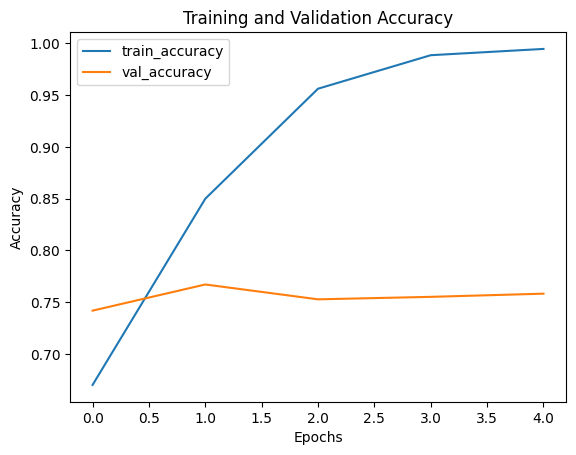

In [ ]:
plt.plot(rnn_model.history.history['accuracy'], label='train_accuracy')
plt.plot(rnn_model.history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()




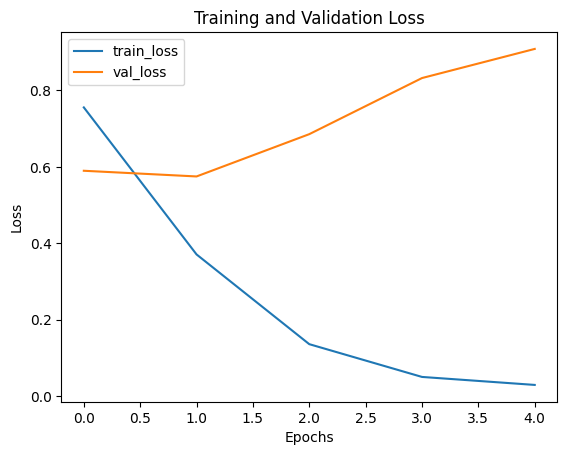

In [ ]:
plt.plot(rnn_model.history.history['loss'], label='train_loss')
plt.plot(rnn_model.history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=100))
lstm_model.add(LSTM(100))
lstm_model.add(Dense(3, activation='softmax'))
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train LSTM Model
lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

Epoch 1/5
183/183 [==============================] - 41s 216ms/step - loss: 0.6933 - accuracy: 0.7090 - val_loss: 0.5291 - val_accuracy: 0.7947
Epoch 2/5
183/183 [==============================] - 34s 185ms/step - loss: 0.4104 - accuracy: 0.8443 - val_loss: 0.5011 - val_accuracy: 0.8091
Epoch 3/5
183/183 [==============================] - 35s 193ms/step - loss: 0.2656 - accuracy: 0.9038 - val_loss: 0.5842 - val_accuracy: 0.7961
Epoch 4/5
183/183 [==============================] - 39s 216ms/step - loss: 0.1776 - accuracy: 0.9381 - val_loss: 0.6036 - val_accuracy: 0.7828
Epoch 5/5
183/183 [==============================] - 35s 193ms/step - loss: 0.1246 - accuracy: 0.9563 - val_loss: 0.7672 - val_accuracy: 0.7869


In [ ]:
lstm_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          1576900   
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense_7 (Dense)             (None, 3)                 303       
                                                                 
Total params: 1657603 (6.32 MB)
Trainable params: 1657603 (6.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


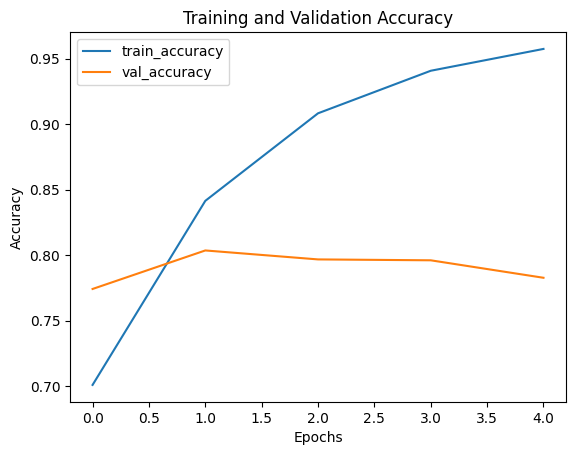

In [ ]:
plt.plot(lstm_model.history.history['accuracy'], label='train_accuracy')
plt.plot(lstm_model.history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()



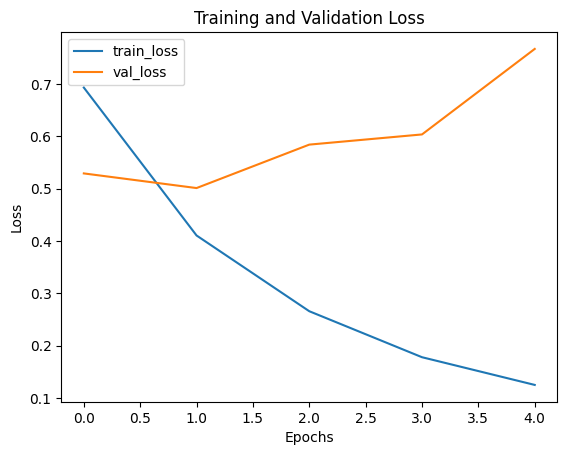

In [ ]:
plt.plot(lstm_model.history.history['loss'], label='train_loss')
plt.plot(lstm_model.history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


 The LSTM model exhibits consistent advancement in both training and validation accuracy, signifying effective learning. the incremental rise in validation loss from epoch 3 needs careful consideration to avoid overfitting.  